In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Print stuff inline
%matplotlib inline

# Imports
import re
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from IPython.display import display

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix, f1_score)
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

import nltk
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import seaborn as sns

In [144]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [145]:
train.isna().sum()

Id                             0
ProductId                      0
UserId                         0
HelpfulnessNumerator           0
HelpfulnessDenominator         0
Score                     300000
Time                           0
Summary                       25
Text                          62
dtype: int64

<AxesSubplot:>

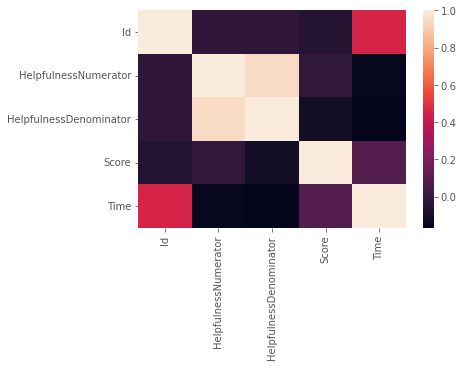

In [47]:
# correlations between all the features
corr =train[train.columns].corr()
# show heapmap of correlations
sns.heatmap(corr)

In [48]:
cor_matrix = train.corr().abs()
print(cor_matrix)

                              Id  HelpfulnessNumerator  \
Id                      1.000000              0.018780   
HelpfulnessNumerator    0.018780              1.000000   
HelpfulnessDenominator  0.021315              0.947211   
Score                   0.055644              0.015280   
Time                    0.453398              0.145893   

                        HelpfulnessDenominator     Score      Time  
Id                                    0.021315  0.055644  0.453398  
HelpfulnessNumerator                  0.947211  0.015280  0.145893  
HelpfulnessDenominator                1.000000  0.105291  0.167752  
Score                                 0.105291  1.000000  0.086252  
Time                                  0.167752  0.086252  1.000000  


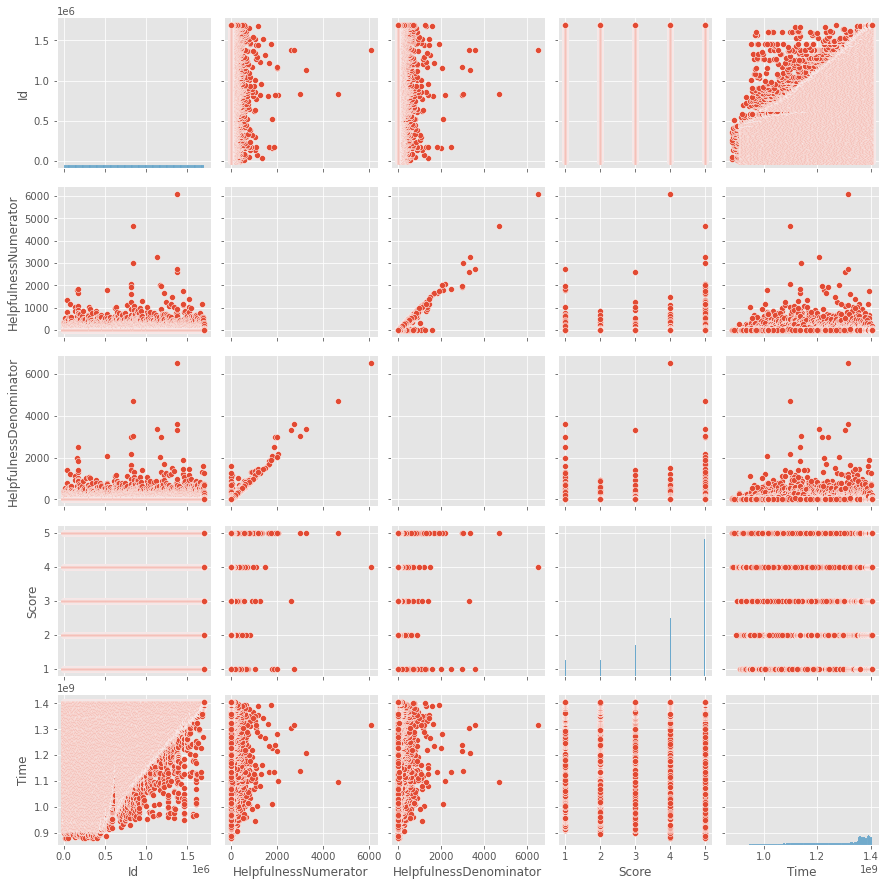

In [49]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(train)

In [50]:
data = train[train['Score'].isnull()==False]

Text(0, 0.5, 'Count')

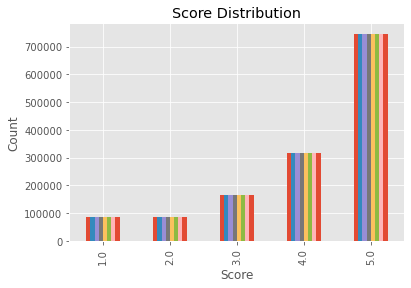

In [51]:
# Create and print a rating distribution graph.
rating_distribution_plt = data.groupby(['Score']).count().plot(kind='bar', legend=None, title="Score Distribution")
rating_distribution_plt.set_xlabel("Score")
rating_distribution_plt.set_ylabel("Count")

In [52]:
##temp data for feature extarction
test = train[train['Score'].isna()] 
train= train[train['Score'].notna()]

In [53]:
train_sample= train.sample(n=30000, random_state=1).sort_index(axis=0)

# DATA EXPLORATION

In [54]:
##temp dataframe
df=train_sample
df.shape

(30000, 9)

In [55]:
##encoding the scores above 3 as one because it doesnt tell much about the review as it is neutral.
df.dropna(inplace=True)
df[df['Score'] != 3]
df['Positivity'] = np.where(df['Score'] > 3, 1, 0)
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Positivity                0
dtype: int64

In [56]:
df.shape

(29998, 10)

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(df['Text'], df['Positivity'], random_state = 0,test_size = 0.3)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(x_train)
vect

CountVectorizer()

In [59]:
vect.get_feature_names()[::5000] ##get the words that appear atelast 100 times

['00',
 'astaire',
 'byers',
 'counterfeiting',
 'dullea',
 'fondly',
 'henderson',
 'jumpsuits',
 'mask',
 'obliviousness',
 'pretenders',
 'rudyard',
 'spasm',
 'timeworn',
 'waw']

In [60]:
# vect.vocabulary_['mask']

In [61]:
x_train_vectorized = vect.transform(x_train)
x_train_vectorized
x_train_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_vectorized, Y_train)

LogisticRegression()

In [63]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

predictions = model.predict(vect.transform(x_test))
print('AUC: ', roc_auc_score(Y_test, predictions))
print("Accuracy: ",round(metrics.accuracy_score(Y_test, predictions),3))
print("F1: ",round(metrics.f1_score(Y_test, predictions),3))

AUC:  0.755349810079709
Accuracy:  0.84
F1:  0.897


In [64]:
##since this out would be in 0 and 1 and wont be used for my kaggle submission i would stop here. but categorizing these into two class labels help in boosting the accuracy.

# More analysis

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df = 5).fit(x_train)
len(vect.get_feature_names())

20872

In [66]:
x_train_vectorized = vect.transform(x_train)
model = LogisticRegression()
model.fit(x_train_vectorized, Y_train)
predictions = model.predict(vect.transform(x_test))
print('AUC: ', roc_auc_score(Y_test, predictions))

AUC:  0.7134590486744615


In [67]:
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = x_train_vectorized.max(0).toarray()[0].argsort()
print('Smallest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest Tfidf: 
['retrieves' 'dropkick' 'nurturing' 'squash' 'antihero' 'choreographers'
 'assures' 'outwit' 'relents' 'assuage']

Largest Tfidf: 
['amusing' 'funny' 'wonderful' 'entertaining' 'awesome' 'perfect' 'scary'
 'great' 'good' 'exellent']



# WE could see that the largest values in TFIDF has all the positive words which can indicate why there are more score of 5 than one or two.

In [68]:
# result = df['Text'].to_string(index = False)

In [69]:
# import spacy
# nlp = spacy.load("en_core_web_sm")
# doc = nlp(result[:100])

In [70]:
# doc

In [71]:
# for token in doc:
#     print(token.text)

In [72]:
# doc_cleaned = [token for token in doc if not token.is_stop and not token.is_punct]
# for token in doc_cleaned:
#     print(token.text)

In [73]:
# doc=nlp(doc)
# for token in doc:
#     print(token.text,'---- ',token.pos_)

In [74]:
# raw_doc=nlp(doc)

# # Checking if POS tag is X and printing them
# print('The junk values are..')
# for token in raw_doc:
#     if token.pos_=='X':
#         print(token.text)

# print('After removing junk')
# # Removing the tokens whose POS tag is junk.
# clean_doc=[token for token in raw_doc if not token.pos_=='X']
# print(clean_doc)

In [75]:
# from spacy.lang.en import English
# nlp = English()

# #text = """When learning data science, you shouldn't get discouraged!
# #Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

# #  "nlp" Object is used to create documents with linguistic annotations.
# my_doc = nlp(doc)

# # Create list of word tokens
# token_list = []
# for token in my_doc:
#     token_list.append(token.text)
# print(token_list)

In [76]:
# from spacy.lang.en.stop_words import STOP_WORDS

# #Implementation of stop words:
# filtered_sent=[]

# #  "nlp" Object is used to create documents with linguistic annotations.
# doc = nlp(doc)

# # filtering stop words
# for word in doc:
#     if word.is_stop==False:
#         filtered_sent.append(word)
# print("Filtered Sentence:",filtered_sent)

In [77]:
# doc = nlp(doc)    
# olist = []
# for token in doc:
#     l = [token.text,
#         token.idx,
#         token.lemma_,
#         token.is_punct,
#         token.is_space,
#         token.shape_,
#         token.pos_,
#         token.tag_]
#     olist.append(l)
    
    
# odf = pd.DataFrame(olist)
# odf.columns= ["Text", "StartIndex", "Lemma", "IsPunctuation", "IsSpace", "WordShape", "PartOfSpeech", "POSTag"]
# odf.head

In [78]:
# nlp = spacy.load('en_core_web_lg')
# nlp = en_core_web_lg.load()

In [79]:
# from scipy import spatial
# cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

# excellent  = nlp.vocab[''].vector
# computed_similarities = []
# for word in nlp.vocab:
#     # Ignore words without vectors
#     if not word.has_vector:
#         continue
#     similarity = cosine_similarity(excellent, word.vector)
#     computed_similarities.append((word, similarity))

# computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])
# print([w[0].text for w in computed_similarities[:100]])

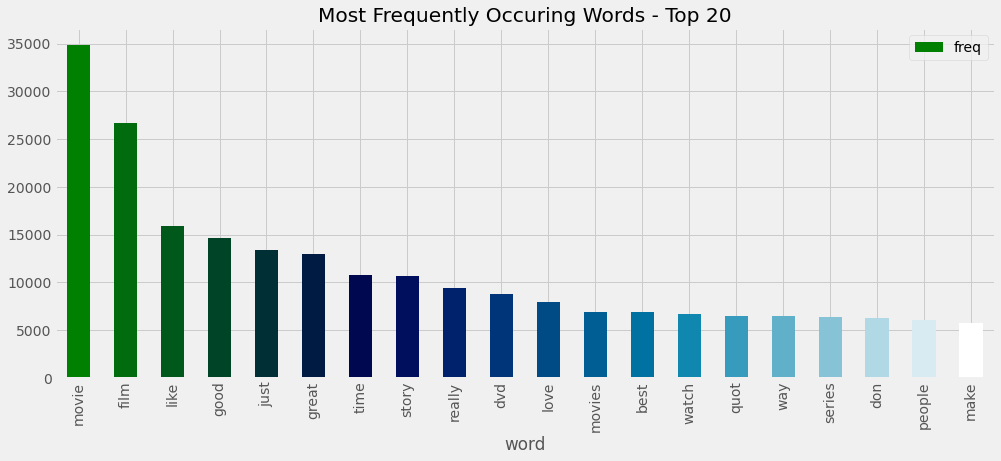

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Text)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

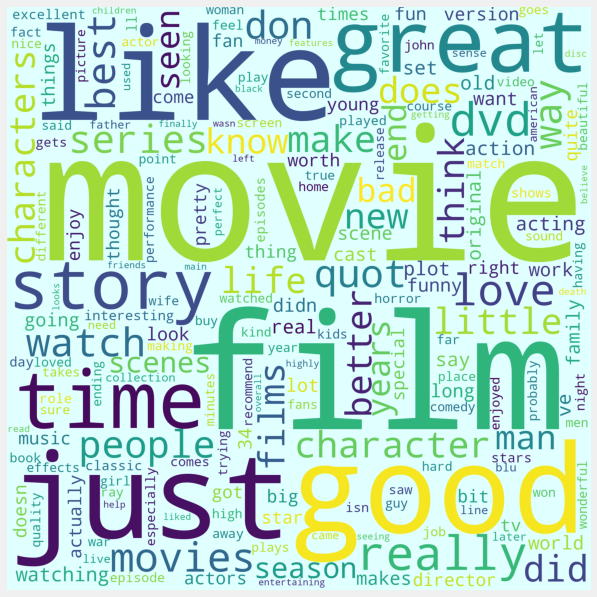

In [81]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

#plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
#plt.title("Vocabulary from TEXT", fontsize = 20)
plt.show()

In [82]:
train['Text']

0          This is a charming version of the classic Dick...
1          It was good but not as emotionally moving as t...
2          Don't get me wrong, Winkler is a wonderful cha...
3          Henry Winkler is very good in this twist on th...
4          This is one of the best Scrooge movies out.  H...
                                 ...                        
1697526    Looking very much forward to this release, but...
1697529    Finally, the holy grail of tv-on-dvd boxsets i...
1697530    Could this be a true or I'm i dreaming batman ...
1697531    I've been a fan of the series since I was a yo...
1697532    People seriously need to wake up and realize t...
Name: Text, Length: 1397533, dtype: object

In [83]:
# train_new['length'] = train_new['Text'].apply(len)
# train_new[train_new['length'] == 23615]['Text'].iloc[0]
# train_new['Text'].fillna('', inplace=True)
# # print(train_new['Text'].map(len).max())
# train_new['length'] = train_new['Text'].apply(len)
# train_new['Text'] 

Text(0, 0.5, 'Count')

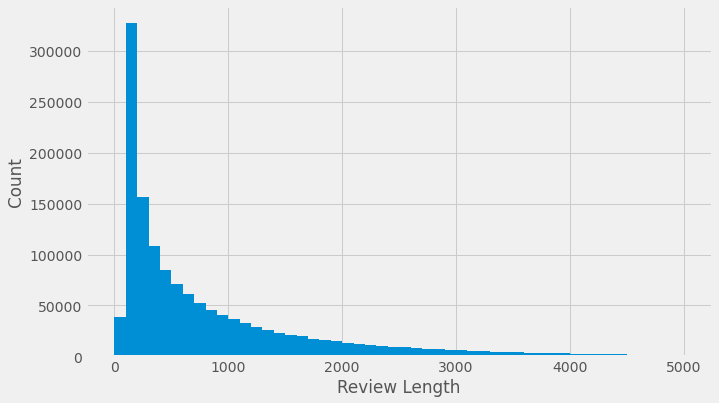

In [84]:
Text_length_distribution_plt = pd.DataFrame(train["Text"].str.len())
Text_length_distribution_plt = Text_length_distribution_plt[Text_length_distribution_plt.Text < 5000]
Text_length_distribution_plt.groupby(["Text"])
Text_length_distribution_plt = Text_length_distribution_plt.plot(kind='hist', 
                                                                     legend=None, 
                                                                     bins=50, 
                                                                     figsize=(10, 6))
Text_length_distribution_plt.set_xlabel("Review Length")
Text_length_distribution_plt.set_ylabel("Count")

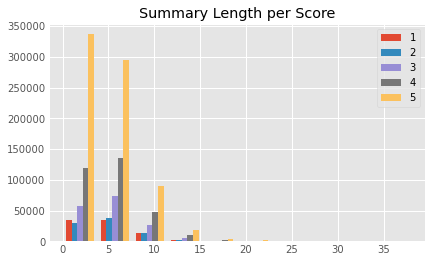

In [175]:
train['SummaryLength'] = train.apply(lambda row : len(row['Summary'].split()) if type(row['Summary']) == str else 0, axis = 1)
fig, ax = plt.subplots()
summary_reviews = []
for i in range(1, 6):
    score = train.where(train['Score'] == float(i))
    summary_reviews.append(score['SummaryLength'].dropna())

plt.hist(summary_reviews, bins=10, label=list(range(1, 6)))
ax.legend(loc='upper right')
plt.title("Summary Length per Score",)
plt.show()

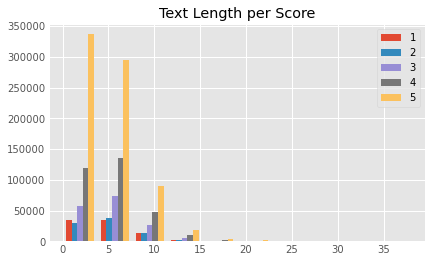

In [174]:
train['TextLength'] = train.apply(lambda row : len(row['Text'].split()) if type(row['Text']) == str else 0, axis = 1)
fig, ax = plt.subplots()
summary_reviews = []
for i in range(1, 6):
    score = train.where(train['Score'] == float(i))
    summary_reviews.append(score['SummaryLength'].dropna())

plt.hist(summary_reviews, bins=10, label=list(range(1, 6)))
ax.legend(loc='upper right')
plt.title("Text Length per Score")
plt.show()

# Text processing and cleaning 

In [87]:
data= train["Text"].sample(n=50, random_state=1).sort_index(axis=0)
data.to_string()

'4754       If you like Godzilla movies then you\'re alread...\n40449      It was great to watch this movie again. It\'s f...\n62474      A great movie! Meryl Streep\'s performance as a...\n64952      I highly recommend this movie to anyone who ha...\n97908      This is a must have movie. Great plot, serious...\n169744     This is a rather unique series, it is too bad ...\n173868     Finally, a comedic television american viewers...\n205909     One of my favorite movies . A funny and touchi...\n284593     Marie Antoinette is an amazing story. Well act...\n465121     I\'m shocked by the other reviews I read about ...\n467636     &quot;Tale of the Mummy&quot; attempts to shak...\n492551     Have always liked this movie. Johnny Depp does...\n494428     Old, decrepit and yet showing sinister signs o...\n502271     20th finally put this great musical out on DVD...\n548569     Finding North begins as Rhonda (Wendy Makkena)...\n551678     I just got through watching this show and I ha...\n581

In [88]:
def remove(x):
    pattern = "['\n',@\'?\.$%_0-9]"
    x = [re.sub(pattern, '', i) for i in x]
    return x

In [89]:
clean = remove(data)
clean

['If you like Godzilla movies then youre already too far gone to save I dont know why I like them I know theyre silly and stupid but theres something nostalgic and amusing about them Mothra was always the most fascinating monster for him to fight A giant moth! Who thought that up A giant radio-active lizard fights a giant benevolent moth island guardian and her two caterpillar babies Awesome is the only word to be used here "Godzilla vs Mothra" is colorful and fun and features those two little cute twins who sing to awaken Mothra If you are already gone and like Godzilla then this could never disappoint youAfter the original "Godzilla" this one is my favorite',
 'It was great to watch this movie again Its funny light hearted and very entertaining Love Grant and Day together',
 'A great movie! Meryl Streeps performance as a woman with cancer is phenomenal Thought provoking - feel good - tear jerker What more could you ask for',
 'I highly recommend this movie to anyone who has never see

In [90]:
def listToString(s):  
    # initialize an empty string
    str1 = ""  
    
    # traverse in the string 
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1 

In [91]:
clean_text = listToString(clean)
# clean_text

In [92]:
#Splitting the text
splitted_text = clean_text.split('\t')
# splitted_text

In [101]:
data = clean_text


In [100]:
from textblob import TextBlob
TextBlob(data).sentiment ##this is the sentiment for n=50. 

Sentiment(polarity=0.1607368777740553, subjectivity=0.5464033462743629)

# Applying model

In [146]:
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords
# viz libs
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
train.isna().sum()

Id                         0
ProductId                  0
UserId                     0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   19
Text                      53
SummaryLength              0
TextLength                 0
dtype: int64

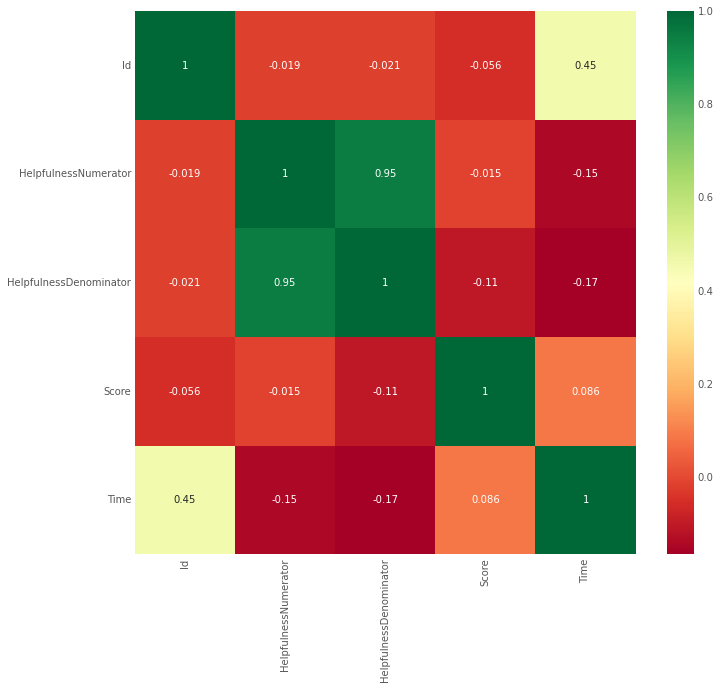

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
# data = pd.read_csv("D://Blogs//train.csv")
X = train.drop("Score",axis=1)  #independent columns
y = train["Score"]    #target column i.e price range
#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Evaluationg Models

In [149]:
#took only 90,000 data poitnst from train set

train_DF = train[train['Score'].notna()]
train_DF.drop(['ProductId', 'UserId','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'], axis = 1, inplace = True)
train_NEW = train_DF.sample(n=90000, random_state=1).sort_index(axis=0)

In [106]:
train_NEW

,Id,Score,Text,SummaryLength,TextLength
69,69,4.0,This remake of the Dickens original is effecti...,8,28
71,71,3.0,If you already have (and love) the Alistair Si...,7,182
72,72,5.0,This is a great movie that sets the classic ta...,7,103
75,75,3.0,Mr. Winkler failed to capture my attention in ...,7,131
108,108,5.0,I saw this for the first time in the 80s and l...,10,36
...,...,...,...,...,...
1697437,1697437,1.0,"At this point, no one can really be surprised ...",12,356
1697460,1697460,4.0,Ratchet's quote perfectly sums up the movie. ...,5,443
1697476,1697476,4.0,I don't go to many movies but we have a 4th of...,3,139
1697486,1697486,3.0,The 3 stars is for the fact that this wonderfu...,17,67


In [107]:
#train_NEW.iloc[:, [2,3]]

In [150]:
#took the entire data from train data whenere nan values were present in scores column.
test_DF = train[train['Score'].isna()]
test_DF.drop(['ProductId', 'UserId','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'], axis = 1, inplace = True)

###take only the rows with values not equal to nan and split this set get validation from y variable and use predict on test set

In [109]:
##chi square 
# from sklearn.feature_selection import chi2
# chi_scores = chi2(X,y)
# p_values = pd.Series(chi_scores[1],index = X.columns)
# p_values.sort_values(ascending = False , inplace = True)
# p_values.plot.bar()

In [151]:
test_DF.isna().sum()

Id            0
Score    300000
Text          9
dtype: int64

In [152]:
train_NEW.shape

(90000, 3)

In [153]:
train_NEW.isna().sum() 

Id       0
Score    0
Text     3
dtype: int64


Step 1 : Preprocess raw reviews to cleaned reviews
Step 2 : Create BoW using CountVectorizer / Tfidfvectorizer in sklearn
Step 3 : Transform review text to numerical representations (feature vectors)
Step 4 : Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.)
Step 5 : Improve the model performance by GridSearch 

In [154]:
# score_TO_predict= train_df['Score']
review_features=train_NEW['Text']
#review_features = review_features.reshape(len(review_features),1)
review_features = np.array(review_features).reshape(review_features.shape)
review_features= pd.DataFrame(review_features)

In [155]:
review_features

,0
0,This remake of the Dickens original is effecti...
1,If you already have (and love) the Alistair Si...
2,This is a great movie that sets the classic ta...
3,Mr. Winkler failed to capture my attention in ...
4,I saw this for the first time in the 80s and l...
...,...
89995,"At this point, no one can really be surprised ..."
89996,Ratchet's quote perfectly sums up the movie. ...
89997,I don't go to many movies but we have a 4th of...
89998,The 3 stars is for the fact that this wonderfu...


In [156]:
##removed the enpty text column using an empty string
review_features=review_features.replace(np.nan, '')
# review_features

In [157]:
review_features.isna().sum()

0    0
dtype: int64

In [158]:
review_features

,0
0,This remake of the Dickens original is effecti...
1,If you already have (and love) the Alistair Si...
2,This is a great movie that sets the classic ta...
3,Mr. Winkler failed to capture my attention in ...
4,I saw this for the first time in the 80s and l...
...,...
89995,"At this point, no one can really be surprised ..."
89996,Ratchet's quote perfectly sums up the movie. ...
89997,I don't go to many movies but we have a 4th of...
89998,The 3 stars is for the fact that this wonderfu...


In [118]:
review_features
vectorizer = TfidfVectorizer(
        min_df=2,               
        max_df=0.95,            
        ngram_range = (1,4),    
        stop_words = 'english',
        max_features = 1000
        )
# Extract features from reviews.
review_features = vectorizer.fit_transform(review_features[0])
print(review_features.toarray())
##converting bag of words to the dataframe 
reviews_features_df = pd.DataFrame(review_features.toarray())
# Map the column names to vocabulary 
reviews_features_df.columns = vectorizer.get_feature_names()
# print(reviews_features_df)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.12222714 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [119]:
import numpy as np
import nimfa
from sklearn.decomposition import NMF
model = NMF(n_components=5, init='random', random_state=0)
W = model.fit_transform(review_features)
H = model.components_

In [120]:
reconstructed = pd.DataFrame(np.round(np.dot(W,H),2))
reconstructed

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.00,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,...,0.00,0.00,0.00,0.01,0.00,0.00,0.0,0.01,0.0,0.0
1,0.00,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,...,0.01,0.01,0.00,0.02,0.00,0.01,0.0,0.01,0.0,0.0
2,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.01,0.00,0.01,0.00,0.00,0.0,0.01,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,...,0.00,0.01,0.00,0.01,0.00,0.00,0.0,0.01,0.0,0.0
4,0.00,0.0,0.0,0.0,0.0,0.0,0.57,0.0,0.0,0.0,...,0.00,0.00,0.00,0.01,0.00,0.00,0.0,0.01,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.01,0.00,0.00,0.0,0.01,0.0,0.0
89996,0.01,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.01,0.01,0.01,0.02,0.01,0.01,0.0,0.01,0.0,0.0
89997,0.00,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,...,0.01,0.01,0.00,0.01,0.00,0.01,0.0,0.01,0.0,0.0
89998,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.01,0.00,0.00,0.0,0.00,0.0,0.0


In [121]:
# X1=reconstructed  ##THIS IS THE TEXT COLumn FROM THE TRAIN_new
# # X.shape
# y1=train_NEW['Score'] ##this is the score column from the train_new which is subsetted data
# X1.shape 

In [122]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,stratify=y1,random_state = 12,test_size = 0.3) 
# print(X1_train.shape)

In [123]:
#simentional reduction predicted value but it comes out to be low than the original data so we would 
#take the entire vectorieed data

# clf1_benchmark= LogisticRegression(random_state=22).fit(X1_train, y1_train)
# print( classification_report(y1_test, clf1_benchmark.predict(X1_test), digits=4))

In [159]:
X=reviews_features_df  ##THIS IS THE TEXT COLumn FROM THE TRAIN_new
# X.shape
y=train_NEW['Score'] ##this is the score column from the train_new which is subsetted data
X.shape 

(90000, 1000)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import model_selection

In [160]:
# ###train_set
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state = 12,test_size = 0.3) 
print(X_train.shape)

(63000, 1000)


In [161]:
##THIS IS MY BENCH MARK MODEL
clf_benchmark= LogisticRegression(random_state=22).fit(X_train, y_train)
print( classification_report(y_test, clf_benchmark.predict(X_test), digits=4))

# plot_confusion_matrix(clf, X_test, y_test)  
# plt.show()

              precision    recall  f1-score   support

         1.0     0.5449    0.4169    0.4724      1660
         2.0     0.3234    0.1421    0.1975      1611
         3.0     0.3849    0.2377    0.2939      3223
         4.0     0.4124    0.2606    0.3194      6108
         5.0     0.6701    0.8923    0.7654     14398

    accuracy                         0.5973     27000
   macro avg     0.4672    0.3899    0.4097     27000
weighted avg     0.5494    0.5973    0.5563     27000



In [185]:
scores=train['Score']
# scores

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure( figsize=(9,4), facecolor='white')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(scores)))
    plt.xticks(tick_marks, set(scores), rotation=45)
    plt.yticks(tick_marks, set(scores))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [188]:
# A function to create and print confusion matrix.
def create_and_print_confusion_matrix(y_test, Y_pred_LR, title):
    cm = confusion_matrix(y_test, Y_pred_LR)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cm, title) 
    plt.show()

In [ ]:
create_and_print_confusion_matrix(y_test, clf_benchmark.predict(X_test), "LogisticRegression")

In [128]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
  
# # Creating the hyperparameter grid
# c_space = np.logspace(-5, 8, 15)
# param_grid = {'C': c_space}
  
# # Instantiating logistic regression classifier
# logreg = LogisticRegression()
# logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
# logreg_cv.fit(X, y)

# # Print the tuned parameters and score
# print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
# print("Best score is {}".format(logreg_cv.best_score_))

In [129]:
# Create a MultinomialNB object
clf_MB = MultinomialNB()
# Fit the classifier
clf_MB.fit(X_train, y_train)
# Measure the accuracy
accuracy = clf_MB.score(X_test, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)
# plot_confusion_matrix(clf, X_test, y_test)  
# plt.show()

The accuracy of the classifier on the test set is 0.554


In [130]:
# print( classification_report(y_test, clf_NB.predict(X_test), digits=4))

In [131]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
clf_SGD = SGDClassifier(random_state=22)
clf_SGD.fit(X_train, y_train)
print( classification_report(y_test, clf_SGD.predict(X_test), digits=4))
# plot_confusion_matrix(clf_SGD, X_test, y_test) 
# plt.show()

              precision    recall  f1-score   support

         1.0     0.4915    0.4163    0.4508      1660
         2.0     0.2716    0.1558    0.1980      1611
         3.0     0.4681    0.0866    0.1461      3223
         4.0     0.3991    0.1212    0.1859      6108
         5.0     0.6216    0.9593    0.7544     14398

    accuracy                         0.5842     27000
   macro avg     0.4504    0.3478    0.3470     27000
weighted avg     0.5241    0.5842    0.5013     27000



In [132]:
accuracy = clf_SGD.score(X_test, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

The accuracy of the classifier on the test set is 0.584


In [133]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train, y_train)
model4_prediction = model4.predict(X_test)
model4_acc = accuracy_score(y_test, model4_prediction)
print(model4_acc)

0.5148148148148148


In [134]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(max_depth = 20)
model5.fit(X_train, y_train)
model5_prediction = model5.predict(X_test)
model5_acc = accuracy_score(y_test, model5_prediction)
print(model5_acc)

0.5372222222222223


In [135]:
from sklearn.svm import LinearSVC
model2 = LinearSVC()
model2.fit(X_train, y_train)
model2_prediction = model2.predict(X_test)
model2_acc = accuracy_score(y_test, model2_prediction)
print(model2_acc)

0.595925925925926


# TEST SET PREDICTION


In [162]:
##FOR TEST_DF
test_DF

,Id,Score,Text
5,5,NaN,This has been a favorite movie of mine for a l...
11,11,NaN,Even though i don't care for Henry Winklers a...
17,17,NaN,Anorher good movie for holiday watchers..a lit...
46,46,NaN,My wife and I grew up in New Hampshire where t...
47,47,NaN,"This is a first for me, I didn't like this mov..."
...,...,...,...
1697520,1697520,NaN,Just how seriously one should take Scott Derri...
1697522,1697522,NaN,Let's be clear - the 5 stars are for the serie...
1697524,1697524,NaN,I would also like to see the original 20th Cen...
1697527,1697527,NaN,Finally to be released on DVD and Blu-Ray Nove...


In [137]:
# review_features_withnan=test_df['Text']
# #review_features = review_features.reshape(len(review_features),1)
# #review_features_withnan = np.array(review_features_withnan)
# review_features_withnan= pd.DataFrame(review_features_withnan)

In [163]:
# review_features_withnan
testset_nan_value_to_test= test_DF['Text']
testset_nan_value_to_test.shape

(300000,)

In [165]:
# review_features_withnan
testset_nan_value_to_test=testset_nan_value_to_test.replace(np.nan, '')

In [166]:
testset_nan_value_to_test.isna().sum()

0

In [167]:
# Extract features from reviews.
review_features_withnan = vectorizer.transform(testset_nan_value_to_test)
print(review_features_withnan.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [168]:
review_features_withnan.shape

(300000, 1000)

In [169]:
# X_train.shape
# y_train.shape

In [170]:
# type(y_test)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)
# instantiate the model (using the default parameters)
# logreg = LogisticRegression()
# # fit the model with data
# logreg.fit(X_train,y_train)
#
Y_pred_LR=clf.predict(review_features_withnan)

In [171]:
Y_pred_LR.shape

(300000,)

In [172]:
# test_DF.isna().sum()
Y_pred_LR

array([5., 4., 4., ..., 5., 5., 5.])

In [ ]:
#MODEL2
from sklearn.svm import LinearSVC
model2 = LinearSVC()
model2.fit(X_train, y_train)
model2_prediction = model2.predict(X_test)
model2_acc = accuracy_score(y_test, model2_prediction)
print(model2_acc)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model2= LinearSVC(random_state=22)
model2.fit(X_train, y_train)
Y_pred_SVC=model2.predict(review_features_withnan)

In [ ]:
Y_pred_SVC.shape

In [ ]:
##MODEL3
clf = MultinomialNB()
# Fit the classifier
clf.fit(X_train, y_train)
# Measure the accuracy
Y_pred_NB=clf.predict(review_features_withnan)

In [ ]:
Y_pred_NB.shape

In [ ]:
##model4
clf_SGD = SGDClassifier(random_state=22)
clf_SGD.fit(X_train, y_train)
Y_pred_SGD=clf_SGD.predict(review_features_withnan)

In [ ]:
Y_pred_SGD

# SUBMISSION


In [ ]:
##lr PREDICTION VALUES
Y_pred_LR

In [ ]:
prediction_LR=np.array(Y_pred_LR)
test_DF['Score']=prediction_LR
# test_DF['ID']
submission = pd.DataFrame(test_DF['Score'])

In [ ]:
submission

In [ ]:
ID = submission.index
submission['ID'] = ID

In [ ]:
submissionCopy = submission[['ID','Score']]
submissionCopy

In [ ]:
# df.to_csv('submission.csv', index = False)

In [ ]:
##SECOND SUBMISSION
Y_pred_SVC
prediction_SVC=np.array(Y_pred_SVC)
test_DF['Score']=prediction_SVC
# test_DF['ID']
submission_SVC = pd.DataFrame(test_DF['Score'])

In [ ]:
ID = submission_SVC.index
submission_SVC['ID'] = ID

In [35]:
submission_SVC = submission_SVC[['ID','Score']]
submission_SVC

,ID,Score
5,5,5.0
11,11,4.0
17,17,4.0
46,46,5.0
47,47,1.0
...,...,...
1697520,1697520,4.0
1697522,1697522,5.0
1697524,1697524,5.0
1697527,1697527,5.0


In [36]:
submission_SVC.to_csv('submission_SVC.csv', index = False)

# Dear grader,
Thank you for your time! :)